In [14]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [16]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [17]:
df.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [18]:
df.size

891

In [19]:
df.shape

(99, 9)

In [20]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [21]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [22]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [23]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

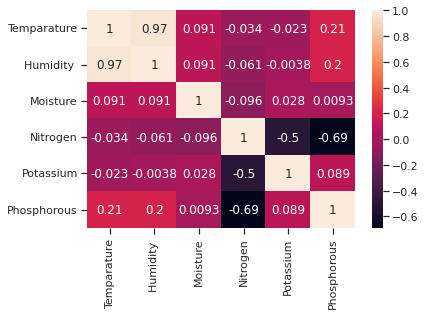

In [24]:
sns.heatmap(df.corr(),annot=True)

In [29]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

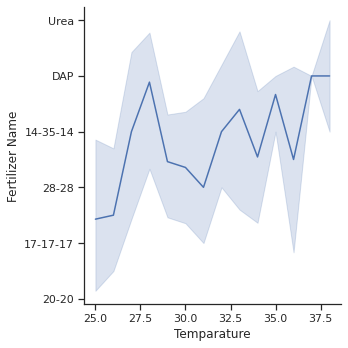

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd


# Create the relplot
sns.relplot(x='Temparature', y='Fertilizer Name', data=df, kind='line')

# Show the plot
plt.show()



In [34]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

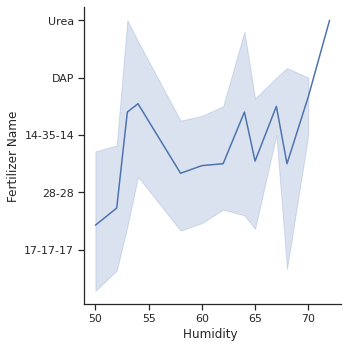

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd


# Create the relplot
sns.relplot(x='Humidity ', y='Fertilizer Name', data=df, kind='line')

# Show the plot
plt.show()



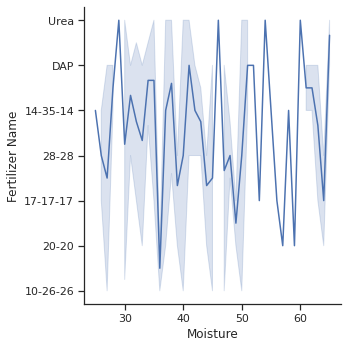

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd


# Create the relplot
sns.relplot(x='Moisture', y='Fertilizer Name', data=df, kind='line')

# Show the plot
plt.show()



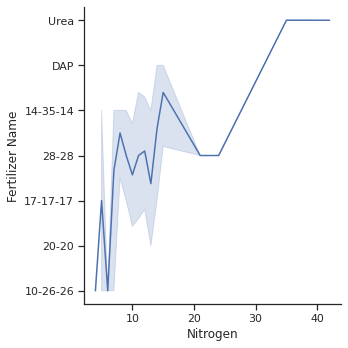

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd


# Create the relplot
sns.relplot(x='Nitrogen', y='Fertilizer Name', data=df, kind='line')

# Show the plot
plt.show()



In [38]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

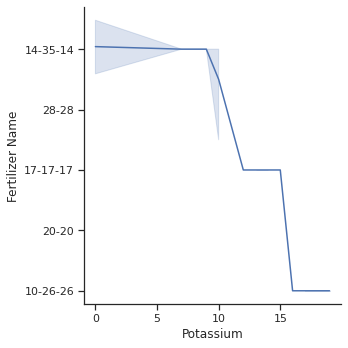

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd


# Create the relplot
sns.relplot(x='Potassium', y='Fertilizer Name', data=df, kind='line')

# Show the plot
plt.show()



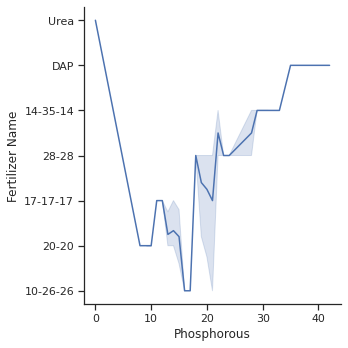

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd


# Create the relplot
sns.relplot(x='Phosphorous', y='Fertilizer Name', data=df, kind='line')

# Show the plot
plt.show()



In [26]:

# Use pd.get_dummies to create dummy variables for categorical columns
df_dummies = pd.get_dummies(df, columns=['Soil Type', 'Crop Type'], prefix='', prefix_sep='')

# Display the resulting DataFrame with dummy variables
print(df_dummies.head())


   Temparature  Humidity   Moisture  Nitrogen  Potassium  Phosphorous  \
0           26         52        38        37          0            0   
1           29         52        45        12          0           36   
2           34         65        62         7          9           30   
3           32         62        34        22          0           20   
4           28         54        46        35          0            0   

  Fertilizer Name  Black  Clayey  Loamy  ...  Cotton  Ground Nuts  Maize  \
0            Urea      0       0      0  ...       0            0      1   
1             DAP      0       0      1  ...       0            0      0   
2        14-35-14      1       0      0  ...       1            0      0   
3           28-28      0       0      0  ...       0            0      0   
4            Urea      0       1      0  ...       0            0      0   

   Millets  Oil seeds  Paddy  Pulses  Sugarcane  Tobacco  Wheat  
0        0          0      0       0  

In [27]:
df=df_dummies.copy()

In [28]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Fertilizer Name', 'Black', 'Clayey', 'Loamy', 'Red',
       'Sandy', 'Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets',
       'Oil seeds', 'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat'],
      dtype='object')

### Seperating features and target label

In [30]:
features = df[['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Black', 'Clayey', 'Loamy', 'Red',
       'Sandy', 'Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets',
       'Oil seeds', 'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat']]
target = df['Fertilizer Name']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df[ 'Fertilizer Name']

In [31]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [32]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.0
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       0.40      1.00      0.57         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.77      0.86      0.80        20
weighted avg       0.79      0.85      0.81        20



In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [37]:
score

array([0.95, 1.  , 0.9 , 0.95, 1.  ])

### Saving trained Decision Tree model

In [38]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.65
              precision    recall  f1-score   support

    10-26-26       1.00      0.33      0.50         3
    14-35-14       0.50      1.00      0.67         2
    17-17-17       1.00      1.00      1.00         1
       20-20       0.67      0.50      0.57         4
       28-28       0.40      0.67      0.50         3
         DAP       0.50      0.50      0.50         2
        Urea       1.00      0.80      0.89         5

    accuracy                           0.65        20
   macro avg       0.72      0.69      0.66        20
weighted avg       0.74      0.65      0.65        20



In [40]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.6 , 0.55, 0.9 , 0.45, 1.  ])

### Saving trained Guassian Naive Bayes model

In [41]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [42]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.5
              precision    recall  f1-score   support

    10-26-26       1.00      0.33      0.50         3
    14-35-14       0.14      0.50      0.22         2
    17-17-17       0.00      0.00      0.00         1
       20-20       1.00      0.25      0.40         4
       28-28       0.33      0.67      0.44         3
         DAP       1.00      0.50      0.67         2
        Urea       1.00      0.80      0.89         5

    accuracy                           0.50        20
   macro avg       0.64      0.44      0.45        20
weighted avg       0.76      0.50      0.53        20



In [43]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.95      , 0.75      , 0.8       , 0.8       , 0.89473684])

In [44]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [46]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

### Saving trained Logistic Regression model

In [47]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9
              precision    recall  f1-score   support

    10-26-26       1.00      0.33      0.50         3
    14-35-14       0.50      1.00      0.67         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.88        20
weighted avg       0.95      0.90      0.89        20



In [49]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.85      , 0.95      , 0.95      , 0.9       , 0.84210526])

### Saving trained Random Forest model

In [50]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [51]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[21:52:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [52]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

[21:52:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

array([0.95, 0.95, 1.  , 0.95, 1.  ])

### Saving trained XGBoost model

In [53]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [55]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(XB, 'xg_boost_fertiliser_recomondation.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('xg_boost_fertiliser_recomondation.pkl')
 
# Use the loaded model to make predictions

## Accuracy Comparison

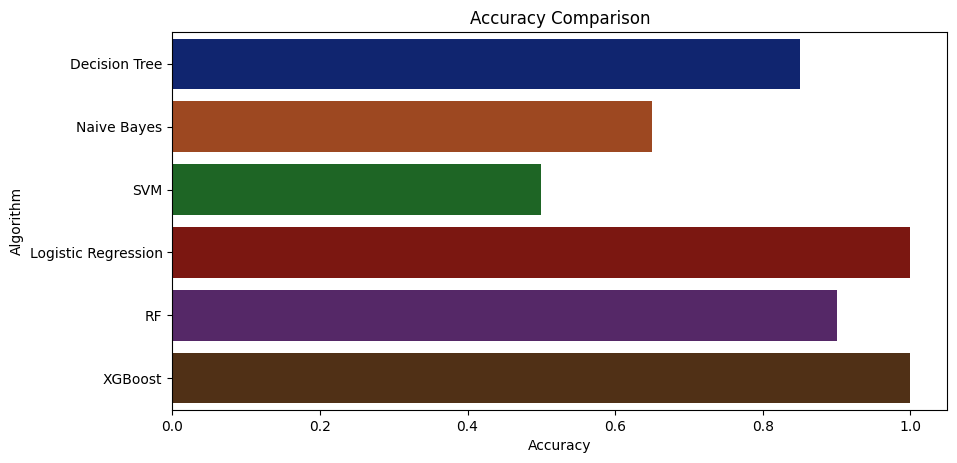

In [56]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [57]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.85
Naive Bayes --> 0.65
SVM --> 0.5
Logistic Regression --> 1.0
RF --> 0.9
XGBoost --> 1.0


## Making a prediction

In [48]:
data = np.array([[ 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [49]:
data = np.array([[ 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['coffee']
